# Prerequisite Tasks

## Question 1
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

>We need a total of $n*k*m$ multiplications. As we multiply $rows$ of first matrix by $columns$ of second matrix, we need to multiply $n$ elements by $k$ elements for each of the $m$ columns in the second matrix. Thus, we need a total of $n*k*m$ additions.

## Question 2

Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n, k, m = 3, 4, 5

mat1 = np.random.randint(0, 10, (n, k))
mat2 = np.random.randint(0, 10, (k, m))

list1 = mat1.tolist()
list2 = mat2.tolist()

print("The time with numpy is:")
%timeit np.matmul(mat1, mat2)
print("The time with python lists is:")

The time with numpy is:
3.22 µs ± 226 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
The time with python lists is:


In [3]:
%%timeit
result = [[0 for i in range(m)] for j in range(n)]
for i in range(n):
    for j in range(m):
        for l in range(k):
            result[i][j] += list1[i][l] * list2[l][j]


17 µs ± 2.66 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Question 3
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Using the method suggested above, finding the median of the array means running n/2 passes over the array in the worst case. Which means that the time complexity is $O(n^2)$ for the suggested algorithm. A better method would be to use a sorting algorithm like quicksort or mergesort and then find the median. This would take $O(nlogn)$ time.


## Question 4
What is the gradient of the following function with respect to x and y?

$$x^2y + y^3sin(x)$$

> The gradient of the following function with respect to $x$ and $y$ is:  
> $$\frac{\partial f}{\partial x} = 2xy + y^3cos(x)$$
> $$\frac{\partial f}{\partial y} = x^2 + 3y^2sin(x)$$

## Question 5
Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [4]:
import jax
import numpy as np
import jax.numpy as jnp


def fn(x,y):
    return (x**2)*y + (y**3)*jnp.sin(x)
def analytical_grad_fn_x(x,y):
    return 2*x*y + y**3*jnp.cos(x)
def analytical_grad_fn_y(x,y):
    return x**2 + 3*(y**2)*jnp.sin(x)
jax_grad_fn = jax.grad(fn, argnums=(0,1))

test_values = [(1.,2.), (3.,4.), (1.,3.), (2.,4.)]
for x,y in test_values:
    print("x = {}, y = {}".format(x,y))
    print("analytical_grad_fn_x = {}, jax_grad_fn_x = {}".format(analytical_grad_fn_x(x,y), jax_grad_fn(x,y)[0]))
    print("analytical_grad_fn_y = {}, jax_grad_fn_y = {}".format(analytical_grad_fn_y(x,y), jax_grad_fn(x,y)[1]))
    print()

x = 1.0, y = 2.0
analytical_grad_fn_x = 8.322418212890625, jax_grad_fn_x = 8.322418212890625
analytical_grad_fn_y = 11.097651481628418, jax_grad_fn_y = 11.097651481628418

x = 3.0, y = 4.0
analytical_grad_fn_x = -39.359519958496094, jax_grad_fn_x = -39.359519958496094
analytical_grad_fn_y = 15.773759841918945, jax_grad_fn_y = 15.773759841918945

x = 1.0, y = 3.0
analytical_grad_fn_x = 20.58816146850586, jax_grad_fn_x = 20.58816146850586
analytical_grad_fn_y = 23.719715118408203, jax_grad_fn_y = 23.719715118408203

x = 2.0, y = 4.0
analytical_grad_fn_x = -10.633398056030273, jax_grad_fn_x = -10.633398056030273
analytical_grad_fn_y = 47.64627456665039, jax_grad_fn_y = 47.64627456665039



## Question 6  
Use `sympy` to confirm that you obtain the same gradient analytically.

In [5]:
import sympy as sym

x, y = sym.symbols('x y')
f = (x**2)*y + (y**3)*sym.sin(x)
print(sym.diff(f, x))
print(sym.diff(f, y))

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


## Question 7

Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

In [6]:
dict = {
    '2022': {
        'Branch 1': {   
            'Roll No': 1,
            'Name': 'Viraj',
            'Marks': {'Maths': 90, 'Physics': 85, 'Chemistry': 80}
        },
        'Branch 2': {   
            'Roll No': 1,
            'Name': 'Siddharth',
            'Marks': {'Maths': 90, 'Physics': 80, 'Chemistry': 80}
        }
    },

    '2023': {
        'Branch 1': {   
            'Roll No': 1,
            'Name': 'Viraj',
            'Marks': {'Maths': 90, 'Physics': 85, 'Chemistry': 80}
        },
        'Branch 2': {   
            'Roll No': 1,
            'Name': 'Siddharth',
            'Marks': {'Maths': 90, 'Physics': 80, 'Chemistry': 80}
        }
    },

    '2024': {
        'Branch 1': {   
            'Roll No': 1,
            'Name': 'Viraj',
            'Marks': {'Maths': 90, 'Physics': 85, 'Chemistry': 80}
        },
        'Branch 2': {   
            'Roll No': 1,
            'Name': 'Siddharth',
            'Marks': {'Maths': 90, 'Physics': 80, 'Chemistry': 80}
        }
    },
    
    '2025': {
        'Branch 1': {   
            'Roll No': 1,
            'Name': 'Viraj',
            'Marks': {'Maths': 90, 'Physics': 85, 'Chemistry': 80}
        },
        'Branch 2': {   
            'Roll No': 1,
            'Name': 'Siddharth',
            'Marks': {'Maths': 90, 'Physics': 80, 'Chemistry': 80}
        }
    }
}

## Question 8

Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [7]:
class Year():
    def __init__(self, year, branch_list) -> None:
        self.year = year
        self.branch_list = branch_list

class Branch():
    def __init__(self, branch_name, student_list) -> None:
        self.branch_name = branch_name
        self.student_list = student_list

class Student():
    def __init__(self, roll_no, name, marks:dict) -> None:
        self.roll_no = roll_no
        self.name = name
        self.marks = marks
        
database = []

student1 = Student(1, 'Viraj', {'Maths': 90, 'Physics': 85, 'Chemistry': 80})
student2 = Student(2, 'Siddharth', {'Maths': 90, 'Physics': 85, 'Chemistry': 80})
branch1 = Branch("CS", [student1, student2])
branch2 = Branch("EE", [student1, student2])
year1 = Year(2023, [branch1, branch2])

database.append(year1)

## Question 9

Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1. $y = x^1$
2. $y = x^2$
2. $y = \dfrac{x^3}{100}$
4. $y = sin(x)$
5. $y = \dfrac{sin(x)}{x}$
6. $y = log(x)$
7. $y = e^x$

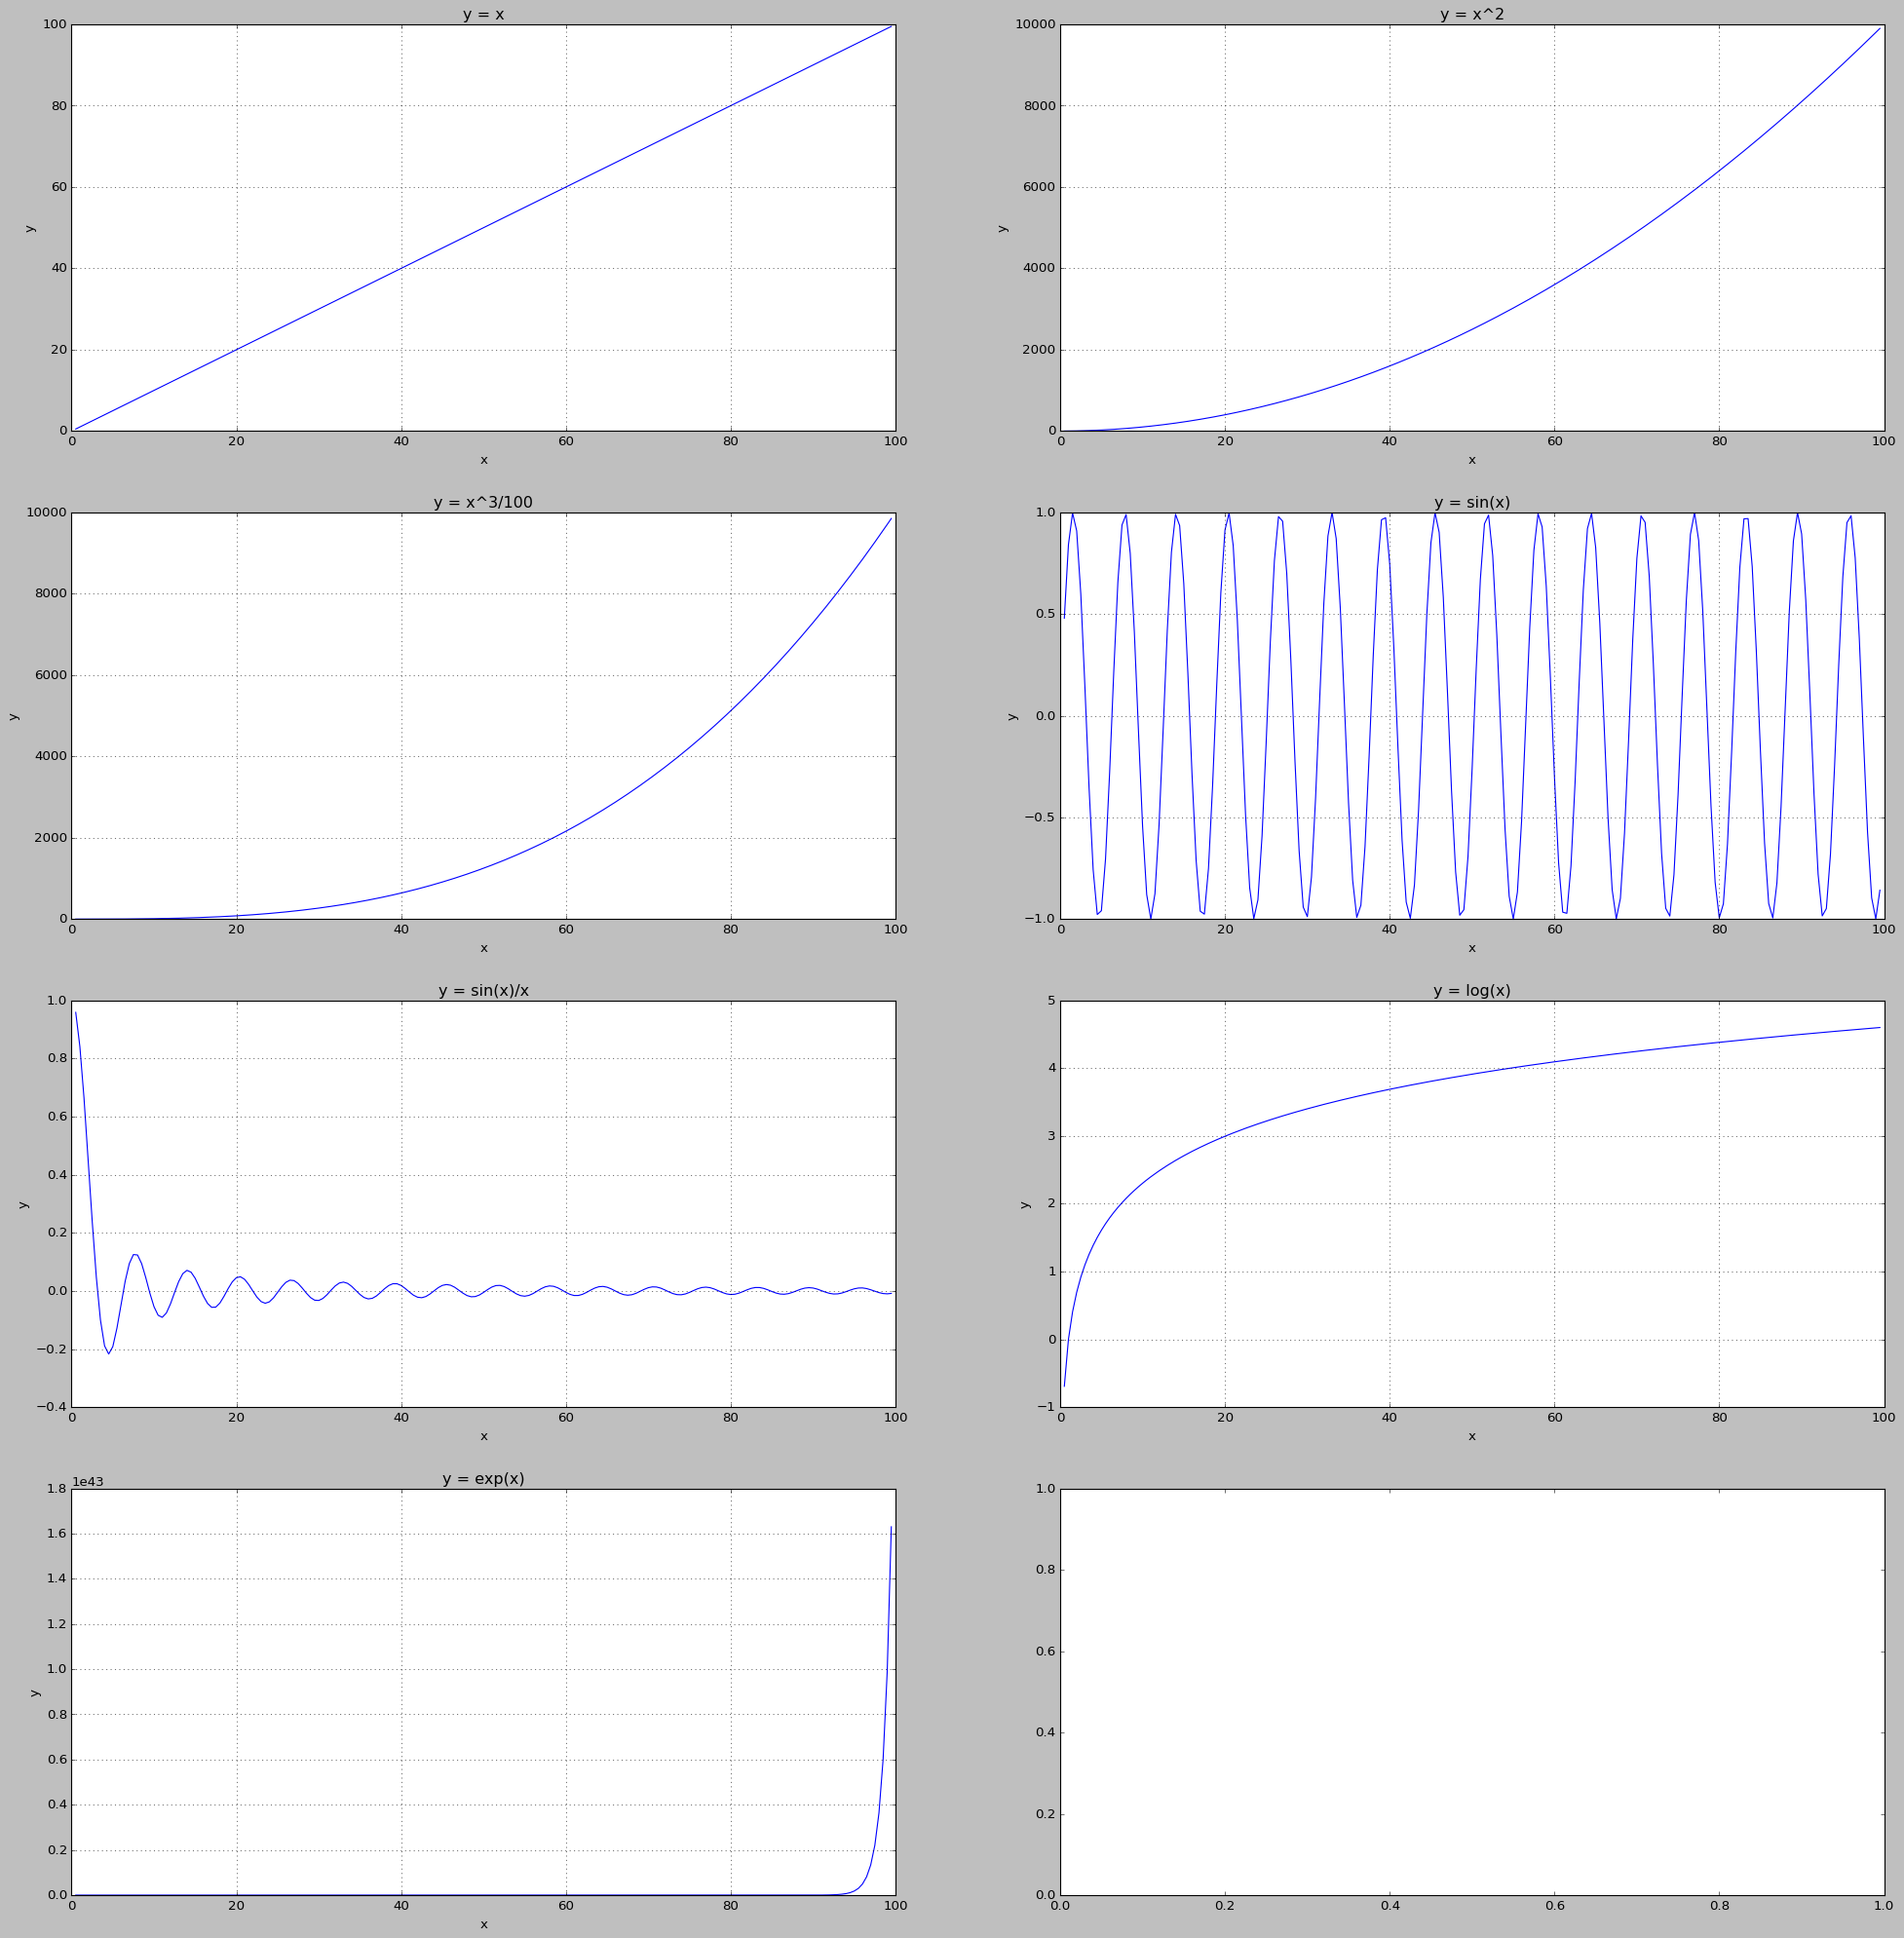

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100, 0.5)

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(30, 30))
fn1 = lambda x: x
fn2 = lambda x: x**2
fn3 = lambda x: x**3/100
fn4 = lambda x: np.sin(x)
fn5 = lambda x: np.sin(x)/x
fn6 = lambda x: np.log(x)
fn7 = lambda x: np.exp(x)

plt.style.use('classic')
ax[0, 0].plot(x, fn1(x))
ax[0, 0].set(xlabel='x', ylabel='y', title='y = x')
ax[0, 0].grid()
ax[0, 1].plot(x, fn2(x))
ax[0, 1].set(xlabel='x', ylabel='y', title='y = x^2')
ax[0, 1].grid()
ax[1, 0].plot(x, fn3(x))
ax[1, 0].set(xlabel='x', ylabel='y', title='y = x^3/100')
ax[1, 0].grid()
ax[1, 1].plot(x, fn4(x))
ax[1, 1].set(xlabel='x', ylabel='y', title='y = sin(x)')
ax[1, 1].grid()
ax[2, 0].plot(x, fn5(x))
ax[2, 0].set(xlabel='x', ylabel='y', title='y = sin(x)/x')
ax[2, 0].grid()
ax[2, 1].plot(x, fn6(x))
ax[2, 1].set(xlabel='x', ylabel='y', title='y = log(x)')
ax[2, 1].grid()
ax[3, 0].plot(x, fn7(x))
ax[3, 0].set(xlabel='x', ylabel='y', title='y = exp(x)')
ax[3, 0].grid()


## Question 10

Using numpy generate a matrix of size `20X5` containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [9]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.rand(20, 5)+1, columns=['a', 'b', 'c', 'd', 'e'])
std_deviation = df.std()
mean = df.mean()

print("The standard deviation of each column in the dataframe is:")
print(std_deviation)
print(f"\nThe column with the highest standard deviation is {std_deviation.idxmax()}\n")
print("The mean of each column in the dataframe is:")
print(mean)
print(f"\nThe column with the highest mean is {mean.idxmax()}")


The standard deviation of each column in the dataframe is:
a    0.305568
b    0.299128
c    0.290822
d    0.289031
e    0.255855
dtype: float64

The column with the highest standard deviation is a

The mean of each column in the dataframe is:
a    1.509822
b    1.551470
c    1.464957
d    1.426815
e    1.433288
dtype: float64

The column with the highest mean is b


## Question 11

Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [10]:
df['f'] = df.loc[:, ['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = pd.Series(["LT8" if df['f'].iloc[i]<8 else "GT8" for i in range(len(df))])

print(f"The number of rows in the dataframe where the value in the column g is 'LT8' is {df.value_counts('g')['LT8']}")
df

The number of rows in the dataframe where the value in the column g is 'LT8' is 16


,a,b,c,d,e,f,g
0,1.852120,1.851029,1.861280,1.031827,1.857461,8.453717,GT8
1,1.816568,1.773854,1.844946,1.676130,1.410356,8.521854,GT8
2,1.981736,1.743371,1.528779,1.011911,1.627708,7.893505,LT8
3,1.318661,1.550220,1.482057,1.831090,1.791676,7.973704,LT8
4,1.435109,1.203712,1.153743,1.476064,1.055297,6.323925,LT8
5,1.935835,1.029773,1.322447,1.077342,1.082793,6.448189,LT8
6,1.577925,1.710461,1.224902,1.712927,1.329929,7.556143,LT8
7,1.410015,1.391423,1.683207,1.597038,1.555593,7.637275,LT8
8,1.806957,1.946832,1.119823,1.340347,1.819604,8.033562,GT8
9,1.778502,1.108446,1.757129,1.511995,1.446055,7.602128,LT8


## Question 12

Write a small piece of code to explain broadcasting in numpy.

In [11]:
import numpy as np

arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.array([[10,20,30,40,50], [100,150,200,250,300], [1000,2000,3000,4000,5000]])

print("\nShape of arr1 is", arr1.shape, "and arr1 is:")
print(arr1)
print("\nShape of arr2 is", arr2.shape, "and arr2 is:")
print(arr2)
print("\nShape of arr1+arr2 is", (arr1+arr2).shape, "and arr1 + arr2 is:")
print("\narr1 + arr2 is:")
print(arr1 + arr2)

# As we can see, the smaller shape 'broadcasts' itself to the larger shape and the operation is performed element-wise. 

# We can also see another example of broadcasting as
arr3 = np.array([[1, 2, 3, 4, 5], [10, 20, 30, 40, 50]])
arr4 = np.array([[100], [1000]])

print("\nShape of arr3 is", arr3.shape, "and arr3 is:")
print(arr3)
print("\nShape of arr4 is", arr4.shape, "and arr4 is:")
print(arr4)
print("\nShape of arr3+arr4 is", (arr3+arr4).shape, "and arr3 + arr4 is:")
print(arr3 + arr4)


Shape of arr1 is (5,) and arr1 is:
[1 2 3 4 5]

Shape of arr2 is (3, 5) and arr2 is:
[[  10   20   30   40   50]
 [ 100  150  200  250  300]
 [1000 2000 3000 4000 5000]]

Shape of arr1+arr2 is (3, 5) and arr1 + arr2 is:

arr1 + arr2 is:
[[  11   22   33   44   55]
 [ 101  152  203  254  305]
 [1001 2002 3003 4004 5005]]

Shape of arr3 is (2, 5) and arr3 is:
[[ 1  2  3  4  5]
 [10 20 30 40 50]]

Shape of arr4 is (2, 1) and arr4 is:
[[ 100]
 [1000]]

Shape of arr3+arr4 is (2, 5) and arr3 + arr4 is:
[[ 101  102  103  104  105]
 [1010 1020 1030 1040 1050]]


## Question 13

Write a function to compute the `argmin` of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the `np.argmin` function to verify your solution.

In [12]:
import numpy as np

random_array = np.random.randint(0, 100, 10)

def custom_argmin(array):
    argmin = 0
    for i in range(len(array)):
        if array[i] < array[argmin]:
            argmin = i
    return argmin

print(f"The array is {random_array}")
print(f"The index of the minimum value in the array with the custom function is {custom_argmin(random_array)}")
print(f"The index of the minimum value in the array with the numpy function is {np.argmin(random_array)}")

The array is [23 41  2 91 42  7 81 79 86 70]
The index of the minimum value in the array with the custom function is 2
The index of the minimum value in the array with the numpy function is 2
